# What Auto ML can do

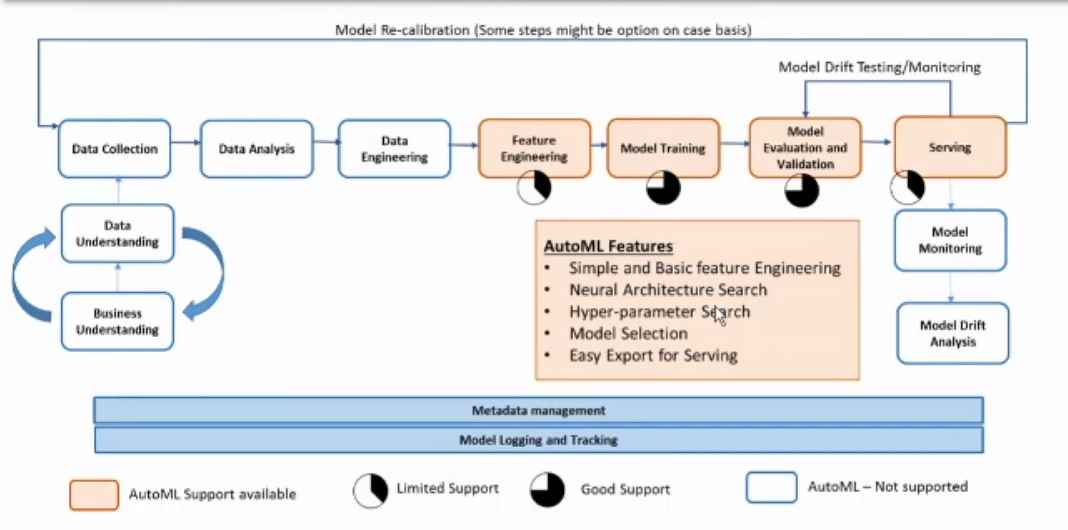

# Auto ML using TPOT

- This is what TPOT can do for you.
- You need to clean the data yourself.
- Need to manually convert data to numeric.
- Need to manually do feature engineering.

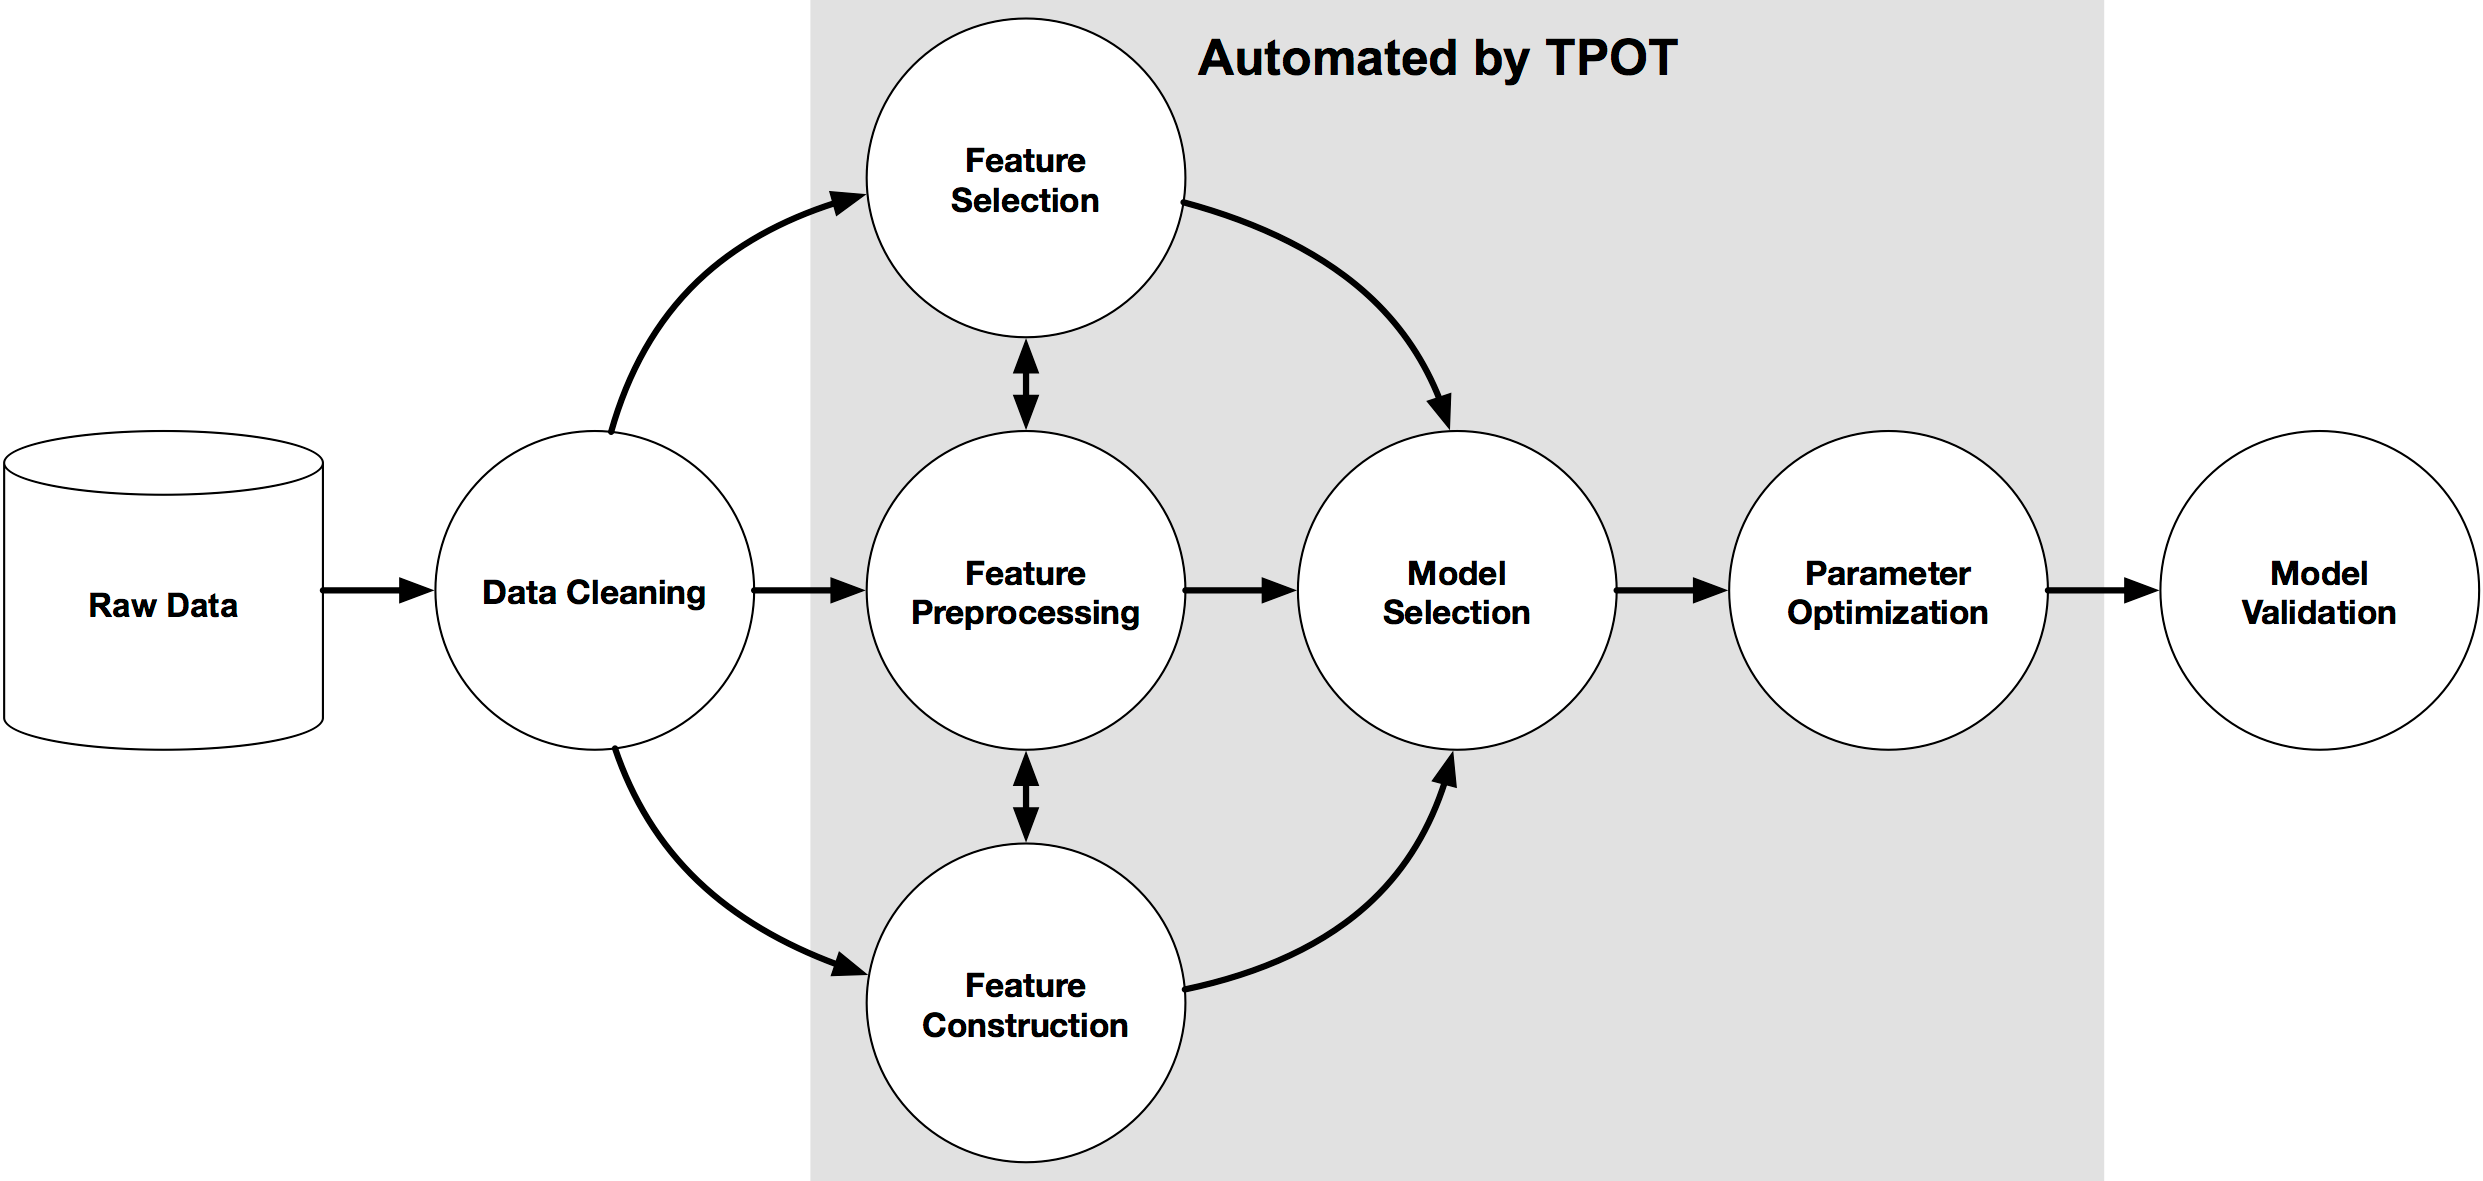

# Installing TPOT

In [0]:
!pip install tpot

# Cleaning the data to use TPOT

In [0]:
from tpot import  TPOTClassifier
import sys,tempfile, urllib, os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [0]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

In [0]:
churn_data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [0]:
churn_df = pd.read_csv(OUTPUT_FILE)

In [7]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
churn_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [0]:
churn_df = churn_df.replace(r'^\s*$', np.nan, regex=True)

In [10]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
churn_df.iloc[: ,19] = pd.to_numeric(churn_df.iloc[:, 19], errors='coerce')

In [12]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [0]:
churn_df.iloc[:, 19] = imp_median.fit_transform(churn_df.iloc[:, 19].values.reshape(-1, 1))

In [0]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [0]:
categorical_columns = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService',
                       'OnlineSecurity','OnlineBackup','DeviceProtection',
                       'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [0]:
column_trans = make_column_transformer((OrdinalEncoder(), categorical_columns))

In [0]:
churn_transformed = column_trans.fit_transform(churn_df)

In [0]:
churn_df_trans = churn_df.copy()
churn_df_trans = pd.DataFrame(churn_transformed, columns=categorical_columns).astype(int)

In [0]:
churn_df.update(churn_df_trans)

In [21]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [0]:
churn_df_y = pd.DataFrame(churn_df['Churn'])
churn_df_x = churn_df.drop(['Churn'], axis=1, inplace=False)

In [0]:
churn_df_y['Churn'] = churn_df_y['Churn'].astype(np.int32) 

In [0]:
churn_df_x.drop(['customerID'], axis=1, inplace=True)

In [0]:
for cols in churn_df_x.columns:
    churn_df_x[cols] = churn_df_x[cols].astype(np.float32) 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(churn_df_x, churn_df_y, train_size=0.75, test_size=0.25, stratify=churn_df_y, random_state=31)

# Time to use TPOT

Use TPOT classifier to find the best model algorithm that fits the data. TPOT uses genetic algorithm based search internally.

In [0]:
from tpot import  TPOTClassifier

In [29]:
tpot = TPOTClassifier()
tpot.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=0, warm_start=False)

In [30]:
tpot.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7932992617830777

In [0]:
# Faster way to do it
import multiprocessing

In [33]:
multiprocessing.set_start_method('forkserver', force=True)
# TPOT uses genetic algorithm.
# There are methods such as random search, grid search and bayesian search as well.
# Population size determines how many models and how many hyperparameters we want to evaluate.
# It generates 20 random models and some sample hyperparametrs in first generation.
# Select some of the top best models that are used in the first generation.
# In second genaration it takes top selected models. It intrechanges paramters and generates new model types from first generation.
# Again pick the top models.
# Typically use 5-6 generations with high populations. It is compute intensive.
tpot = TPOTClassifier(generations=5, population_size=30, verbosity=2, n_jobs=-1, random_state=31)
print(tpot.fit(X_train, y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: 0.8070805022791777
Generation 2 - Current best internal CV score: 0.807648325736074
Generation 3 - Current best internal CV score: 0.807648325736074
Generation 4 - Current best internal CV score: 0.807648325736074
Generation 5 - Current best internal CV score: 0.8093541254551189

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.2, min_samples_leaf=12, min_samples_split=17, n_estimators=100)
TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=30,
               random_state=31, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)


In [34]:
print(tpot.score(X_test, y_test))

0.7893242475865985


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Export the scikit learn code for best classifier and display the code.

It gives the code which can be easily exportede and run.

In [0]:
tpot.export('tpot_churn_pipeline.py')

In [36]:
! cat tpot_churn_pipeline.py

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=31)

# Average CV score on the training set was: 0.8093541254551189
exported_pipeline = RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.2, min_samples_leaf=12, min_samples_split=17, n_estimators=100)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 31)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


Getting details on algorithms that TPOT used and performed

In [0]:
# Gets a list of candidates that were evaluated by the TPOT
tpot.evaluated_individuals_

In [38]:
# Displays the best fitted pipeline
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features=0.2,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=12,
                                        min_samples_split=17,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=31,
                                        verbose=0, warm_start=False))],
         verbose=False)